## Goal: Analyze the correlations between the factors we have created and the anisotropy matrix generated from the polarized spectra 

In [20]:
import os
import json
import helpers

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path

import importlib
importlib.reload(helpers) 

pd.reset_option("display.max_rows")
pd.reset_option("display.max_columns")
pd.reset_option("display.width")
pd.reset_option("display.max_colwidth")

# Standardizing Plots
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['legend.loc'] = 'upper left'
plt.rcParams['legend.fancybox'] = True
plt.rcParams['figure.figsize'] = (10, 6)

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'

### Factor Dictionary Paths

In [21]:
#Read in file and turn it into a dataframe

Cr_data_path = "Cr_data/Cr_fd_3_10_2025"
Cr_oxide_data_path = "Cr_oxide_data/Cr_oxide_fd_3_29_2025"
Cu_data_path = "Cu_data/Cu_fd_2_24_2025"
Fe_data_path = "Fe_data/Fe_fd_2_24_2025"


#### Generate Factor DF

In [ ]:
normalization_orders = [1,2,3,4,5,6,7,8,9,10,11,12,13] #Specifys the normalization factors for DM QM and ST

def get_factor_df(data_path, mat_props = True, dipole = True, quadrupole = True, steinhart=True, normalization_orders= normalization_orders):
    factor_df = helpers.generate_factor_df(data_path, mat_props, dipole, quadrupole, steinhart, normalization_orders)
    return factor_df


factor_df = get_factor_df(Cr_oxide_data_path, mat_props = True, dipole = True, quadrupole = True, steinhart=True, normalization_orders=normalization_orders)

# Display the DataFrame
print(factor_df.head())
print(factor_df.shape[0])


           Chem Formula    Cif Name  Space Group Number Average Bond Length  \
Material                                                                      
mp-1024044      Mg3CrO4  mp-1024044                 221                None   
mp-1030818    NaMg6CrO8  mp-1030818                 123                None   
mp-1031027    LiMg6CrO8  mp-1031027                 123                None   
mp-1031245     KMg6CrO8  mp-1031245                 123                None   
mp-1031428    Mg6TiCrO8  mp-1031428                 123                None   

           Bond Length Std Average Bond Angle Bond Angle Std  \
Material                                                       
mp-1024044            None               None           None   
mp-1030818            None               None           None   
mp-1031027            None               None           None   
mp-1031245            None               None           None   
mp-1031428            None               None           None  

Drop chemical info

In [23]:
factor_df = factor_df.drop(columns = ["Average Bond Length", "Bond Length Std", "Average Bond Angle", "Bond Angle Std", "Number of Unique Ligands"])

### Anisotropy Matrix Path

In [24]:
#Read in file and turn it into a dataframe
Cr_a_matrix_path = "Cr_data/a_matrix_data/04MAR25_anisotropy_matrix_from_02MAR25_data.csv"
Cr_oxide_a_matrix_path = "Cr_oxide_data/a_matrix_data/05MAR25_anisotropy_matrix_Cr_oxide_data.csv"
Cr_oxide_a_matrix_path_charles = "Cr_oxide_data/a_matrix_data/Cr-oxide_aniso_results.json"
Cu_a_matrix_path = "Cu_data/a_matrix/Cu_05FEB_anisotropy_data.csv"
Fe_a_matrix_path = "Fe_data/a_matrix/Fe_05FEB25_anisotropy_data.csv"

Load Anisotropy Matricies for json

In [25]:
spectra_df = helpers.load_anisotropy_matrix_json(Cr_oxide_a_matrix_path_charles)

Load Anisotropy Matricies 

In [ ]:
"""

Can be used if the spectra ansio matrix is in csv format

def get_spectra_df(data_path, target_atom):
    spectra_df = helpers.load_anisotropy_matrix(data_path,target_atom)
    return spectra_df

spectra_df = get_spectra_df(Cr_oxide_a_matrix_path, "Cr")

"""
#Check matrix formatting
print(spectra_df)
print(spectra_df.shape[0])

            m00       m01       m02       m10  m11       m12       m20  \
Material                                                                 
mp-1024044  0.0  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
mp-1030818  0.0  0.017070  0.017070  0.017070  0.0  0.000000  0.017070   
mp-1030883  0.0  0.006363  0.006363  0.006363  0.0  0.000000  0.006363   
mp-1031027  0.0  0.011899  0.011899  0.011899  0.0  0.000000  0.011899   
mp-1031245  0.0  0.009179  0.009179  0.009179  0.0  0.000000  0.009179   
...         ...       ...       ...       ...  ...       ...       ...   
mp-861612   0.0  0.004258  0.006477  0.004258  0.0  0.004184  0.006477   
mp-866101   0.0  0.000001  0.000000  0.000001  0.0  0.000001  0.000000   
mp-867746   0.0  0.005296  0.003213  0.005296  0.0  0.005599  0.003213   
mp-884288   0.0  0.005434  0.006526  0.005434  0.0  0.009060  0.006526   
mp-996996   0.0  0.000178  0.004386  0.000178  0.0  0.004564  0.004386   

                 m21  m22  
Material 

Clean data 

In [27]:
factor_df, spectra_df, dropped_factor_df = helpers.align_dataframes(factor_df, spectra_df)

Dropped 1              Chem Formula    Cif Name  Space Group Number  \
Material                                                    
mp-1182406       CrHSe3O8  mp-1182406                  14   
mp-1183712         CrGeO3  mp-1183712                 221   
mp-1212562  NaCrH12(SO4)2  mp-1212562                 205   
mp-1227753    Ca4CrFe3O10  mp-1227753                  14   
mp-1369597    Li2CrSi7O16  mp-1369597                   1   
mp-771329       Na3CrPCO7   mp-771329                   4   
mp-772100      CrSn(PO4)2   mp-772100                  11   
mp-780708         Na5CrO4   mp-780708                  59   

            Average Electronegativity  Std Electronegativity  Band Gap  \
Material                                                                 
mp-1182406                   2.982034               0.613390    3.0003   
mp-1183712                   2.934419               0.773152    0.0000   
mp-1212562                   2.537317               0.711234    0.1447   
mp-122775

Check the cleaning and alligning

In [28]:
print("factor_df")
print(factor_df.head(5))
print(factor_df.tail(5))
print("anisotropy_matrix_df")
print(spectra_df.head(5))
print(spectra_df.tail(5))
print(factor_df.shape[0])
print(spectra_df.shape[0])

factor_df
           Chem Formula    Cif Name  Space Group Number  \
Material                                                  
mp-1024044      Mg3CrO4  mp-1024044                 221   
mp-1030818    NaMg6CrO8  mp-1030818                 123   
mp-1031027    LiMg6CrO8  mp-1031027                 123   
mp-1031245     KMg6CrO8  mp-1031245                 123   
mp-1031428    Mg6TiCrO8  mp-1031428                 123   

            Average Electronegativity  Std Electronegativity  Band Gap  \
Material                                                                 
mp-1024044                   2.348000               1.042483    0.0000   
mp-1030818                   2.329750               1.060600    2.1237   
mp-1031027                   2.299048               1.043289    2.5121   
mp-1031245                   2.314750               1.078719    2.0429   
mp-1031428                   2.350750               1.039537    0.0000   

             Density                              Oxidati

In [29]:
#pd.set_option("display.max_rows", None)    # Show all rows
#pd.set_option("display.max_columns", None) # Show all columns
#pd.set_option("display.width", None)       # Don't wrap lines
#pd.set_option("display.max_colwidth", None) # Show full column content
print(dropped_factor_df)
print(dropped_factor_df.shape[0])

             Chem Formula    Cif Name  Space Group Number  \
Material                                                    
mp-1182406       CrHSe3O8  mp-1182406                  14   
mp-1183712         CrGeO3  mp-1183712                 221   
mp-1212562  NaCrH12(SO4)2  mp-1212562                 205   
mp-1227753    Ca4CrFe3O10  mp-1227753                  14   
mp-1369597    Li2CrSi7O16  mp-1369597                   1   
mp-771329       Na3CrPCO7   mp-771329                   4   
mp-772100      CrSn(PO4)2   mp-772100                  11   
mp-780708         Na5CrO4   mp-780708                  59   

            Average Electronegativity  Std Electronegativity  Band Gap  \
Material                                                                 
mp-1182406                   2.982034               0.613390    3.0003   
mp-1183712                   2.934419               0.773152    0.0000   
mp-1212562                   2.537317               0.711234    0.1447   
mp-1227753         

Compute normed spacegroup number

In [30]:
factor_df = helpers.compute_normed_spacegroup_number(factor_df)

print(factor_df)


             Chem Formula    Cif Name  Space Group Number  \
Material                                                    
mp-1024044        Mg3CrO4  mp-1024044                 221   
mp-1030818      NaMg6CrO8  mp-1030818                 123   
mp-1031027      LiMg6CrO8  mp-1031027                 123   
mp-1031245       KMg6CrO8  mp-1031245                 123   
mp-1031428      Mg6TiCrO8  mp-1031428                 123   
...                   ...         ...                 ...   
mp-861240      Li3Al2CrO6   mp-861240                  12   
mp-861612      CrFe(PO4)2   mp-861612                  11   
mp-866101          AcCrO3   mp-866101                 221   
mp-867746      CrCu(PO4)2   mp-867746                  11   
mp-884288   Li4Ti4V4CrO18   mp-884288                  55   

            Average Electronegativity  Std Electronegativity  Band Gap  \
Material                                                                 
mp-1024044                   2.348000               1.0424

Sum anisotropy matrix elements

In [31]:
spectra_df = helpers.compute_off_diagonal_sum(spectra_df)

print(spectra_df)


            m00       m01       m02       m10  m11       m12       m20  \
Material                                                                 
mp-1024044  0.0  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
mp-1030818  0.0  0.017070  0.017070  0.017070  0.0  0.000000  0.017070   
mp-1031027  0.0  0.011899  0.011899  0.011899  0.0  0.000000  0.011899   
mp-1031245  0.0  0.009179  0.009179  0.009179  0.0  0.000000  0.009179   
mp-1031428  0.0  0.013159  0.013159  0.013159  0.0  0.000000  0.013159   
...         ...       ...       ...       ...  ...       ...       ...   
mp-861240   0.0  0.003779  0.002422  0.003779  0.0  0.001369  0.002422   
mp-861612   0.0  0.004258  0.006477  0.004258  0.0  0.004184  0.006477   
mp-866101   0.0  0.000001  0.000000  0.000001  0.0  0.000001  0.000000   
mp-867746   0.0  0.005296  0.003213  0.005296  0.0  0.005599  0.003213   
mp-884288   0.0  0.005434  0.006526  0.005434  0.0  0.009060  0.006526   

                 m21  m22  Anisotropy

Compute the Aniso DM and QM sum for each normalization

In [32]:
# Create a dictionary to hold the new calculated columns
aniso_qm_dm_sum = {}

for n in normalization_orders[2:]:
    for m in normalization_orders:
        aniso_qm_dm_sum[f"Aniso Sum DM 1/r^{m} QM 1/r^{n}"] = factor_df[f"Aniso Sum DM 1/r^{m}"] + factor_df[f"Aniso Sum QM 1/r^{n}"]

# Convert the dictionary to a DataFrame
aniso_qm_dm_sum_df = pd.DataFrame(aniso_qm_dm_sum)

# Efficiently combine with the original DataFrame
factor_df = pd.concat([factor_df, aniso_qm_dm_sum_df], axis=1)


### Analyze correlations using Ordinary Least Squares (OLS)

### Check the r^2 value for ols model varrying QM and DM normalizations

In [ ]:
import statsmodels.api as sm

#The key is the nth exponent for QM normalization and the values are keys for DM normalization with corresponding value r squared
results_qm_dm_st = {}
results_qm_dm = {}

y_pred = []

for n in normalization_orders[2:]:
    results_qm_dm_st[n] = {}  # Create a sub-dictionary for QM normalization
    results_qm_dm[n] = {} # Create a sub-dictionary for QM normalization

    for m in normalization_orders:
        if m not in results_qm_dm_st[n]:   # Initialize the second-level dictionary
            results_qm_dm_st[n][m] = {}


        for p in normalization_orders:
        
            print(f"Running with QM normalization 1/r^{n} DM normalization 1/r^{m} and ST normalization 1/r^{p} ")

            columns_to_use_1 = [
                f"Aniso Sum DM 1/r^{m} QM 1/r^{n}",
                f"DM Norm 1/r^{m} 0", f"DM Norm 1/r^{m} 1", f"DM Norm 1/r^{m} 2",
                f"Aniso DM 1/r^{m} 1", f"Aniso DM 1/r^{m} 2", f"Aniso DM 1/r^{m} 5",
                f"Aniso Sum DM 1/r^{m}", f"Aniso Sum QM 1/r^{n}",
                f"QM Norm 1/r^{n} 0", f"QM Norm 1/r^{n} 1", f"QM Norm 1/r^{n} 2",
                f"QM Norm 1/r^{n} 3", f"QM Norm 1/r^{n} 4", f"QM Norm 1/r^{n} 5",
                f"QM Norm 1/r^{n} 6", f"QM Norm 1/r^{n} 7", f"QM Norm 1/r^{n} 8",
                f"Aniso QM 1/r^{n} 1", f"Aniso QM 1/r^{n} 2", f"Aniso QM 1/r^{n} 5",
            ]
            
            columns_to_use_2 = [
                f"Aniso Sum DM 1/r^{m} QM 1/r^{n}",
                f"DM Norm 1/r^{m} 0", f"DM Norm 1/r^{m} 1", f"DM Norm 1/r^{m} 2",
                f"Aniso DM 1/r^{m} 1", f"Aniso DM 1/r^{m} 2", f"Aniso DM 1/r^{m} 5",
                f"Aniso Sum DM 1/r^{m}", f"Aniso Sum QM 1/r^{n}",
                f"QM Norm 1/r^{n} 0", f"QM Norm 1/r^{n} 1", f"QM Norm 1/r^{n} 2",
                f"QM Norm 1/r^{n} 3", f"QM Norm 1/r^{n} 4", f"QM Norm 1/r^{n} 5",
                f"QM Norm 1/r^{n} 6", f"QM Norm 1/r^{n} 7", f"QM Norm 1/r^{n} 8",
                f"Aniso QM 1/r^{n} 1", f"Aniso QM 1/r^{n} 2", f"Aniso QM 1/r^{n} 5",
                "Band Gap", "Density","Average Electronegativity",
                    f"Steinhart Vector 1/r^{p} 0", f"Steinhart Vector 1/r^{p} 2", f"Steinhart Vector 1/r^{p} 3",
                    f"Steinhart Vector 1/r^{p} 5", f"Steinhart Vector 1/r^{p} 8", f"Steinhart Vector 1/r^{p} 9",
                    f"Steinhart Vector 1/r^{p} 10", f"Steinhart Vector Sum 1/r^{p}", "Normed Spacegroup Number"
            ]

            columns_to_use = columns_to_use_2

            X = factor_df[columns_to_use]

            # Declare y
            y = spectra_df["Anisotropy Matrix Sum"]

            # Ensure X and y are aligned
            X, y = X.align(y, axis=0)

            # Convert all data to numeric
            X = X.apply(pd.to_numeric, errors='coerce')
            y = pd.to_numeric(y, errors='coerce')

            # Add a constant to X for the intercept
            X = sm.add_constant(X)

            # Drop any rows with NaN values in X or y
            X = X.dropna()
            y = y.loc[X.index]  # Ensure the index alignment is maintained

            # Fit the model
            model = sm.OLS(y, X)
            results = model.fit()

            # Store R-squared value in dictionary
            results_qm_dm_st[n][m][p] = results
            results_qm_dm[n][m] = results

            # Print the R-squared value
            print(f"R-squared: {results.rsquared}")

            #Get the predictions for highest r squared
            if n == 7 and m == 13 and p == 12:
                print("Getting predicitons for n = 7 m = 13 p = 12")
                y_pred = results.predict(X)

print(results_qm_dm_st[8][8][8].summary())

print(f"Y Prediction: {y_pred}")


Running with QM normalization 1/r^3 DM normalization 1/r^1 and ST normalization 1/r^1 
R-squared: 0.3621004499405338
Running with QM normalization 1/r^3 DM normalization 1/r^1 and ST normalization 1/r^2 
R-squared: 0.38907784428379244
Running with QM normalization 1/r^3 DM normalization 1/r^1 and ST normalization 1/r^3 
R-squared: 0.44027404313181673
Running with QM normalization 1/r^3 DM normalization 1/r^1 and ST normalization 1/r^4 
R-squared: 0.47580906525357747
Running with QM normalization 1/r^3 DM normalization 1/r^1 and ST normalization 1/r^5 
R-squared: 0.4926646104424057
Running with QM normalization 1/r^3 DM normalization 1/r^1 and ST normalization 1/r^6 
R-squared: 0.4961941918933426
Running with QM normalization 1/r^3 DM normalization 1/r^1 and ST normalization 1/r^7 
R-squared: 0.4969990634594418
Running with QM normalization 1/r^3 DM normalization 1/r^1 and ST normalization 1/r^8 
R-squared: 0.4991148162037986
Running with QM normalization 1/r^3 DM normalization 1/r^1 an

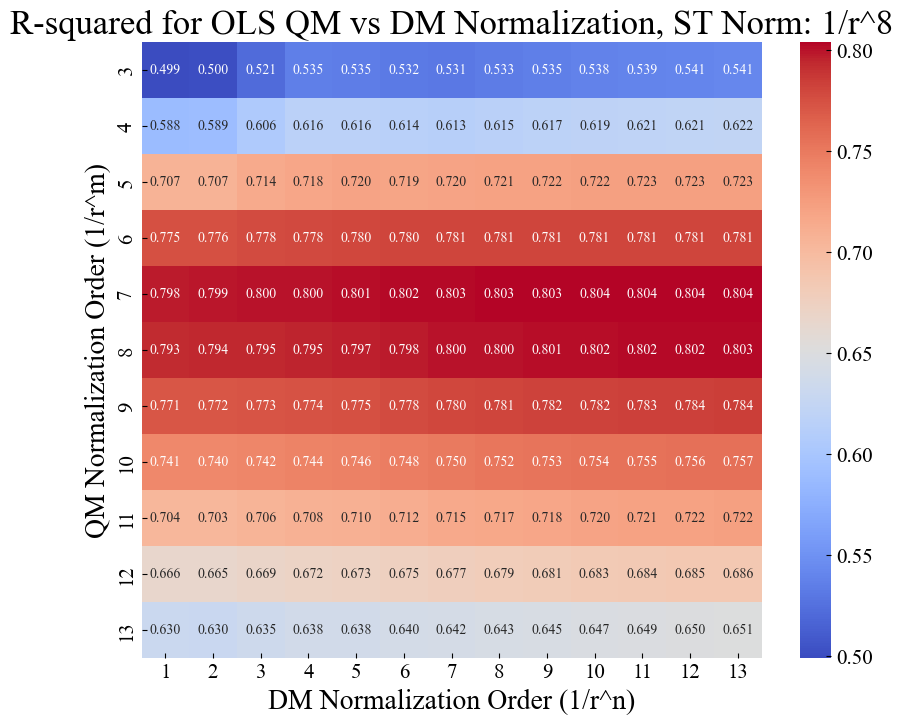

In [34]:
import seaborn as sns

st_norm = 8

# Extract QM and DM orders
qm_orders = list(results_qm_dm.keys())
dm_orders = list(next(iter(results_qm_dm.values())).keys())

# Create 2D array for heatmap
heatmap_data = np.array([[results_qm_dm_st[qm][dm][st_norm].rsquared for dm in dm_orders] for qm in qm_orders])

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap='coolwarm',
            xticklabels=dm_orders, yticklabels=qm_orders)

plt.title(f"R-squared for OLS QM vs DM Normalization, ST Norm: 1/r^{st_norm}")
plt.xlabel("DM Normalization Order (1/r^n)")
plt.ylabel("QM Normalization Order (1/r^m)")
plt.show()


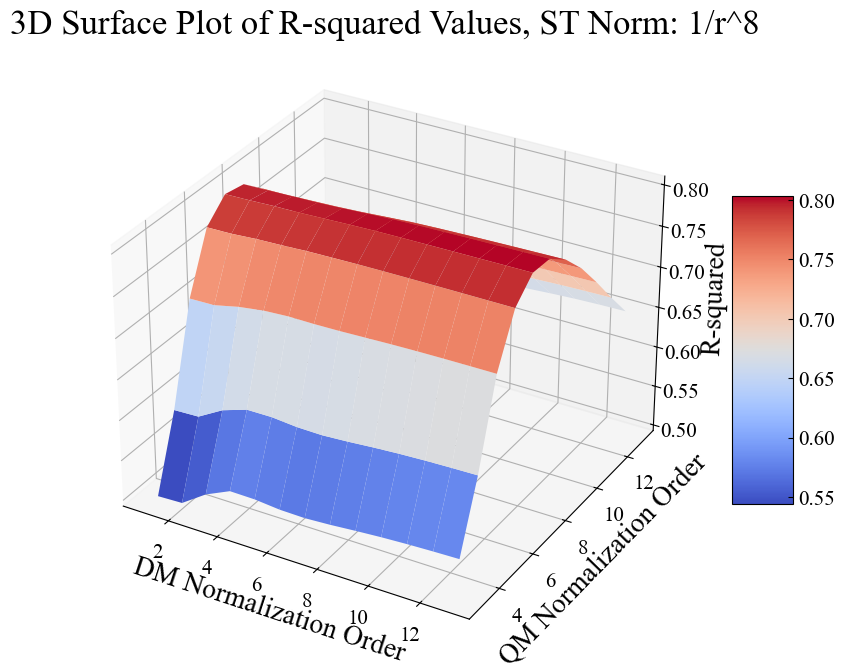

In [35]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

st_norm = 8

# Generate meshgrid for plotting
X, Y = np.meshgrid(dm_orders, qm_orders)
Z = np.array([[results_qm_dm_st[qm][dm][st_norm].rsquared for dm in dm_orders] for qm in qm_orders])

# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)

# Add labels and title
ax.set_title(f"3D Surface Plot of R-squared Values, ST Norm: 1/r^{st_norm}")
ax.set_xlabel("DM Normalization Order")
ax.set_ylabel("QM Normalization Order")
ax.set_zlabel("R-squared")

# Add color bar for reference
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
plt.show()


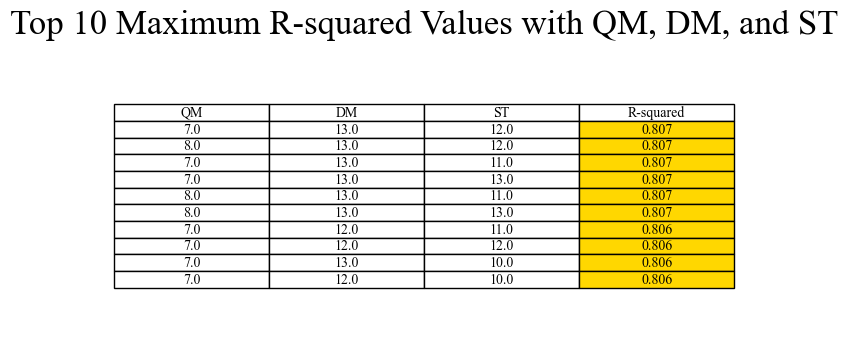

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

TOP_N = 10

# Collect R-squared data for plotting
r2_data = []

for n in results_qm_dm_st:
    for m in results_qm_dm_st[n]:
        for p in results_qm_dm_st[n][m]:
            r2_data.append({
                "QM": n,
                "DM": m,
                "ST": p,
                "R-squared": results_qm_dm_st[n][m][p].rsquared
            })

# Convert to DataFrame
r2_df = pd.DataFrame(r2_data)


# Create DataFrame for the Top N values
top_n = r2_df.nlargest(TOP_N, 'R-squared')

# Display as a table
plt.figure(figsize=(8, 4))
plt.axis('tight')
plt.axis('off')

table_data = top_n[['QM', 'DM', 'ST', 'R-squared']].round(3).values
column_labels = ['QM', 'DM', 'ST','R-squared']

# Create the table
table = plt.table(cellText=table_data, 
                   colLabels=column_labels, 
                   cellLoc='center',
                   loc='center')

# Highlight the highest R-squared value
for i in range(len(top_n)):
    table[(i + 1, 3)].set_facecolor('gold')

plt.title(f'Top {TOP_N} Maximum R-squared Values with QM, DM, and ST')
plt.show()


#### Plot the predicted against actual for Highest Rsquared

<>:6: SyntaxWarning: invalid escape sequence '\h'
<>:6: SyntaxWarning: invalid escape sequence '\h'
C:\Users\John\AppData\Local\Temp\ipykernel_17212\479246417.py:6: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel("Predicted Output ($\hat{y}$)", fontsize=14)


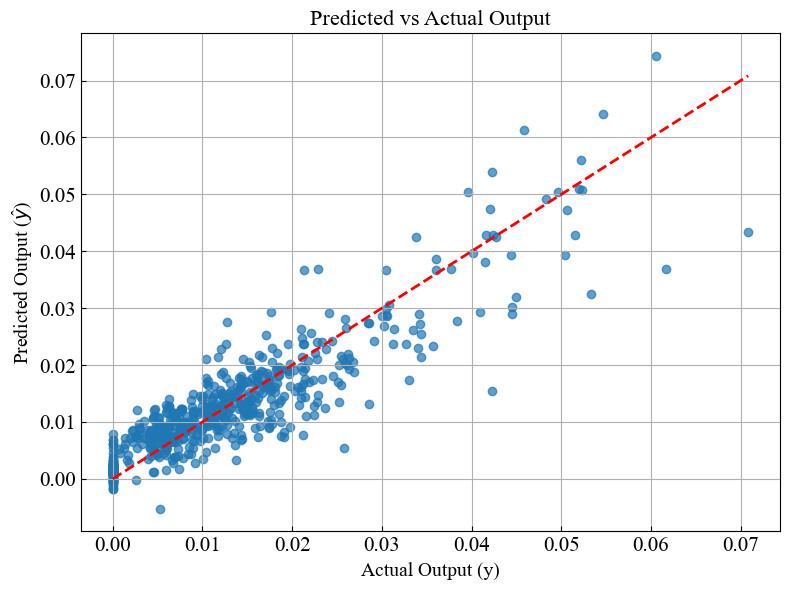

In [37]:

# Plot predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual Output (y)", fontsize=14)
plt.ylabel("Predicted Output ($\hat{y}$)", fontsize=14)
plt.title("Predicted vs Actual Output", fontsize=16)
plt.grid(True)

plt.tight_layout()
plt.show()

#### Check outliers where y true is zero but the prediction is not

In [38]:
# Collect outliers where y_true is zero but the prediction is not
y_outliers = []

for i, txt in enumerate(y_pred.index):
    if y.iloc[i] == 0 and y_pred.iloc[i] != 0:
        diff = abs(y_pred.iloc[i] - y.iloc[i])
        y_outliers.append((txt, y.iloc[i], y_pred.iloc[i], diff))

# Sort outliers by descending difference
y_outliers.sort(key=lambda x: x[3], reverse=True)

# Print header
print("Material\t y_true\t y_pred\t abs_diff")

# Print sorted results
for txt, y_true, y_hat, diff in y_outliers:
    print(f"{txt} {diff:.4f}")

Material	 y_true	 y_pred	 abs_diff
mp-24108 0.0069
mp-1024044 0.0061
mp-1183695 0.0061
mp-1183719 0.0061
mp-1520359 0.0054
mp-1210512 0.0045
mp-1522297 0.0039
mp-1227861 0.0037
mp-1076360 0.0033
mp-1516519 0.0032
mp-1521154 0.0031
mp-1517681 0.0029
mp-1521763 0.0027
mp-1521877 0.0027
mp-1516332 0.0026
mp-1519512 0.0026
mp-1522185 0.0025
mp-1519687 0.0025
mp-1522114 0.0025
mp-1517968 0.0025
mp-1516810 0.0024
mp-773503 0.0023
mp-1520536 0.0023
mp-1519369 0.0022
mp-1517386 0.0021
mp-19062 0.0021
mp-1520463 0.0021
mp-1522086 0.0021
mp-1523312 0.0021
mp-1517595 0.0021
mp-1521441 0.0021
mp-1520105 0.0021
mp-1517440 0.0021
mp-1520949 0.0020
mp-1518792 0.0020
mp-1227851 0.0020
mp-19353 0.0020
mp-1518724 0.0020
mp-1522443 0.0020
mp-1518505 0.0019
mp-1518389 0.0019
mp-1517794 0.0019
mp-1519678 0.0019
mp-1518707 0.0018
mp-1517625 0.0018
mp-20530 0.0018
mp-1517157 0.0017
mp-1229299 0.0017
mp-1076642 0.0017
mp-19257 0.0016
mp-1521686 0.0016
mp-1516623 0.0016
mp-1517268 0.0016
mp-1522588 0.0016
mp-1

### Compute correlation matrix for factros that give largest r squared

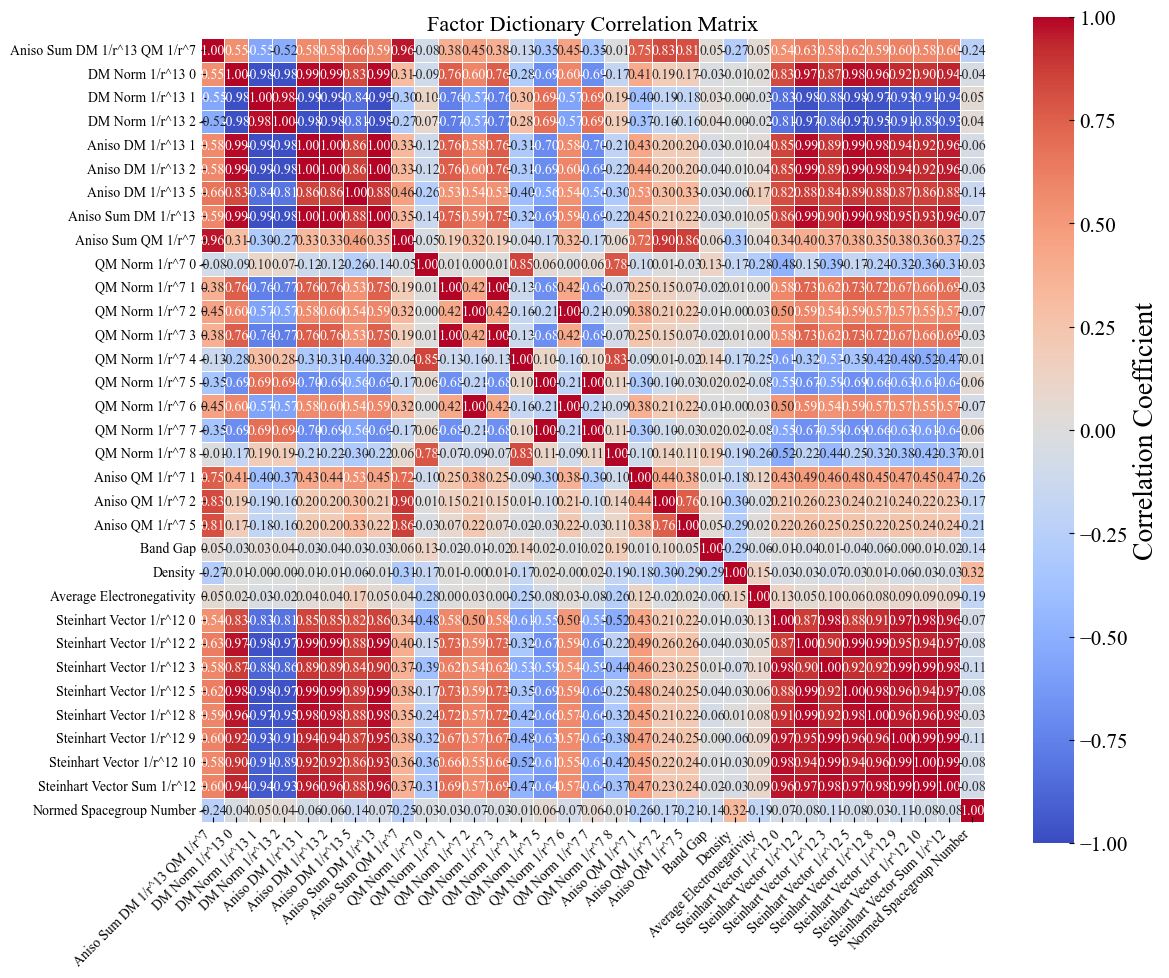

In [39]:
import seaborn as sns

columns_to_use = [
                f"Aniso Sum DM 1/r^{13} QM 1/r^{7}",
                f"DM Norm 1/r^{13} 0", f"DM Norm 1/r^{13} 1", f"DM Norm 1/r^{13} 2",
                f"Aniso DM 1/r^{13} 1", f"Aniso DM 1/r^{13} 2", f"Aniso DM 1/r^{13} 5",
                f"Aniso Sum DM 1/r^{13}", f"Aniso Sum QM 1/r^{7}",
                f"QM Norm 1/r^{7} 0", f"QM Norm 1/r^{7} 1", f"QM Norm 1/r^{7} 2",
                f"QM Norm 1/r^{7} 3", f"QM Norm 1/r^{7} 4", f"QM Norm 1/r^{7} 5",
                f"QM Norm 1/r^{7} 6", f"QM Norm 1/r^{7} 7", f"QM Norm 1/r^{7} 8",
                f"Aniso QM 1/r^{7} 1", f"Aniso QM 1/r^{7} 2", f"Aniso QM 1/r^{7} 5",
                "Band Gap", "Density","Average Electronegativity",
                    f"Steinhart Vector 1/r^{12} 0", f"Steinhart Vector 1/r^{12} 2", f"Steinhart Vector 1/r^{12} 3",
                    f"Steinhart Vector 1/r^{12} 5", f"Steinhart Vector 1/r^{12} 8", f"Steinhart Vector 1/r^{12} 9",
                    f"Steinhart Vector 1/r^{12} 10", f"Steinhart Vector Sum 1/r^{12}", "Normed Spacegroup Number"
            ]



# Compute the correlation matrix
factor_df_corr = factor_df[columns_to_use].corr()


# Set up the figure size properly
plt.figure(figsize=(12, 10))

# Use seaborn's heatmap instead of imshow for better visualization
sns.heatmap(
    factor_df_corr,
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    annot=True,  # Displays correlation values
    fmt=".2f",   # Format values to 2 decimal places
    linewidths=0.5,  # Add grid lines for readability
    square=True,  # Ensure the heatmap is square-shaped
    cbar_kws={"label": "Correlation Coefficient"}  # Label for color bar
)

# Improve label spacing and rotation
plt.xticks(rotation=45, ha="right", fontsize=10)  # Rotate x-labels for readability
plt.yticks(fontsize=10)  # Adjust y-label font size
plt.title("Factor Dictionary Correlation Matrix", fontsize=16)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

